In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [2]:
datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20200101", "00_Temperature.parquet.gzip")

data = pd.read_parquet(datafile_path)

data.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,243.653610,243.643524,243.633408,243.623260,243.613113,243.602951,243.592773,243.582611,243.572433,243.562256,...,243.752396,243.742752,243.733047,243.723282,243.713455,243.703583,243.693665,243.683716,243.673706,243.663681
-88.3125,244.443848,244.417038,244.389252,244.359955,244.329956,244.299271,244.267914,244.235901,244.203232,244.169922,...,244.754135,244.723068,244.691299,244.658875,244.625763,244.592026,244.557632,244.522614,244.495316,244.469940
-87.1875,246.001556,245.956085,245.908630,245.859207,245.807846,245.751389,245.688171,245.623230,245.556564,245.488220,...,246.335175,246.312286,246.287308,246.260269,246.231171,246.198730,246.163376,246.125977,246.086533,246.045044
-86.0625,248.542007,248.408768,248.271759,248.131012,247.986588,247.838547,247.705780,247.612518,247.516434,247.358154,...,249.371140,249.391632,249.369370,249.342209,249.259323,249.149780,249.036179,248.918549,248.796951,248.671417
-84.9375,249.486023,249.234131,248.946945,248.659775,248.372696,248.085831,247.799301,247.513199,247.227631,246.942719,...,250.672028,250.587204,250.500488,250.411896,250.321457,250.229233,250.135223,250.039474,249.942047,249.728958


In [3]:
columns = data.columns.to_numpy()
min_col_idx, max_col_idx = 0, 0

for i in range(len(columns)):
    if float(columns[i]) > 90 and min_col_idx == 0:
        min_col_idx = i - 1
    if float(columns[i]) > 155 and max_col_idx == 0:
        max_col_idx = i

target_area_data = data.loc[-10:40, columns[min_col_idx:max_col_idx]]
target_area_arr = target_area_data.to_numpy()
max_press_val, min_press_val = target_area_arr.max(), target_area_arr.min()
print(max_press_val, min_press_val)
target_area_data.head()

309.75858 245.96153


,89.4375,90.5625,91.6875,92.8125,93.9375,95.0625,96.1875,97.3125,98.4375,99.5625,...,144.5625,145.6875,146.8125,147.9375,149.0625,150.1875,151.3125,152.4375,153.5625,154.6875
-9.5625,300.317474,300.226471,300.221680,300.292236,300.458405,300.655640,300.715393,300.624451,300.488495,300.394531,...,301.438538,301.115234,300.933350,305.521179,303.744171,301.752563,300.772736,301.010254,301.182404,301.125702
-8.4375,300.405518,300.312164,300.304413,300.354584,300.470093,300.655853,300.758911,300.747711,300.695038,300.657013,...,300.213684,300.392700,300.515900,300.940613,300.280518,300.862183,301.255585,301.365967,301.432709,301.427185
-7.3125,300.496948,300.447845,300.421143,300.422760,300.461823,300.594543,300.648407,300.699768,300.816284,300.859039,...,297.540924,296.937286,297.273834,299.231812,300.663422,301.355011,301.347961,301.512939,301.653198,301.552948
-6.1875,300.569977,300.512512,300.518097,300.571472,300.649017,300.745148,300.632233,300.586853,300.572601,300.640289,...,297.016754,297.776001,298.506165,300.039429,300.809570,300.732727,301.010712,300.909851,301.419342,300.925262
-5.0625,300.623260,300.550446,300.559570,300.643372,300.694580,300.730255,300.676178,300.527405,300.383575,300.221252,...,299.983673,300.650848,298.713501,300.262268,301.422089,300.862457,304.686584,300.252869,301.083923,301.424774


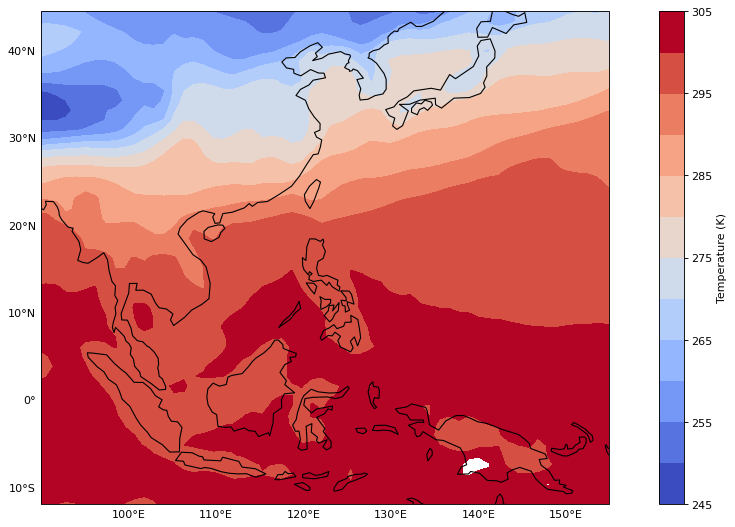

In [6]:
grid_mesh = np.meshgrid(data.columns.astype(np.float32).to_numpy(), data.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

clevs = np.arange(245, 310, 5)
cmap = cm.coolwarm
norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation="vertical")

# Fig Info
cbar.set_label("Temperature (K)")

plt.show()
plt.close()

In [5]:
data

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,243.653610,243.643524,243.633408,243.623260,243.613113,243.602951,243.592773,243.582611,243.572433,243.562256,...,243.752396,243.742752,243.733047,243.723282,243.713455,243.703583,243.693665,243.683716,243.673706,243.663681
-88.3125,244.443848,244.417038,244.389252,244.359955,244.329956,244.299271,244.267914,244.235901,244.203232,244.169922,...,244.754135,244.723068,244.691299,244.658875,244.625763,244.592026,244.557632,244.522614,244.495316,244.469940
-87.1875,246.001556,245.956085,245.908630,245.859207,245.807846,245.751389,245.688171,245.623230,245.556564,245.488220,...,246.335175,246.312286,246.287308,246.260269,246.231171,246.198730,246.163376,246.125977,246.086533,246.045044
-86.0625,248.542007,248.408768,248.271759,248.131012,247.986588,247.838547,247.705780,247.612518,247.516434,247.358154,...,249.371140,249.391632,249.369370,249.342209,249.259323,249.149780,249.036179,248.918549,248.796951,248.671417
-84.9375,249.486023,249.234131,248.946945,248.659775,248.372696,248.085831,247.799301,247.513199,247.227631,246.942719,...,250.672028,250.587204,250.500488,250.411896,250.321457,250.229233,250.135223,250.039474,249.942047,249.728958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84.9375,246.285980,246.378769,246.468201,246.554214,246.636810,246.715927,246.796204,246.892517,246.986023,247.076675,...,242.844757,243.189819,243.533737,243.876343,244.242203,244.611572,244.978226,245.342056,245.702927,246.060669
86.0625,245.038345,245.107742,245.175797,245.242508,245.305359,245.354630,245.401993,245.447403,245.490845,245.532303,...,242.560349,242.803574,243.047394,243.291718,243.536453,243.781509,244.050781,244.324234,244.596680,244.867981
87.1875,244.601593,244.602341,244.602295,244.601425,244.599762,244.597275,244.593979,244.589874,244.584961,244.579239,...,243.150024,243.299500,243.449860,243.601059,243.753052,243.905762,244.059128,244.213104,244.367615,244.522629
88.3125,244.021011,244.020111,244.018326,244.015656,244.012100,244.007660,244.002335,243.996124,243.989044,243.981094,...,243.886047,243.903915,243.920929,243.937103,243.952423,243.966873,243.980469,243.993179,244.005020,244.015991
